In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Housing_Modified.csv')
df

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,two,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,four,yes,yes,no,no,yes,0,no
542,94000.0,6000,3,2,four,yes,no,no,no,yes,0,no
543,103000.0,6000,3,2,four,yes,yes,no,no,yes,1,no
544,105000.0,6000,3,2,two,yes,yes,no,no,yes,1,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    object 
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 51.3+ KB


# Preping the data for the model

In [4]:
keys = df['stories'].unique()
values = [2, 1, 3, 4]
d = dict(zip(keys, values))
d

{'two': 2, 'one': 1, 'three': 3, 'four': 4}

In [5]:
d = {'two': 2, 'one': 1, 'three': 3, 'four': 4}
df = df.replace(d)
df

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
542,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
543,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
544,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no


In [6]:
d = {'yes' : 1, 'no' : 0}
df = df.replace(d)
df

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,49500.0,3060,3,1,1,1,0,0,0,0,0,0
3,60500.0,6650,3,1,2,1,1,0,0,0,0,0
4,61000.0,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,1,1,0,0,1,0,0
542,94000.0,6000,3,2,4,1,0,0,0,1,0,0
543,103000.0,6000,3,2,4,1,1,0,0,1,1,0
544,105000.0,6000,3,2,2,1,1,0,0,1,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    int64  
 6   recroom   546 non-null    int64  
 7   fullbase  546 non-null    int64  
 8   gashw     546 non-null    int64  
 9   airco     546 non-null    int64  
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 51.3 KB


### Scaling the data

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler

StandardScaler()

In [9]:
feature_names = list(filter(lambda x: x not in ['price'], df.columns))
# feature_names

X = df[feature_names]
y = df['price']

In [10]:
X

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,5850,3,1,2,1,0,1,0,0,1,0
1,4000,2,1,1,1,0,0,0,0,0,0
2,3060,3,1,1,1,0,0,0,0,0,0
3,6650,3,1,2,1,1,0,0,0,0,0
4,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
541,4800,3,2,4,1,1,0,0,1,0,0
542,6000,3,2,4,1,0,0,0,1,0,0
543,6000,3,2,4,1,1,0,0,1,1,0
544,6000,3,2,2,1,1,0,0,1,1,0


In [11]:
y

0       42000.0
1       38500.0
2       49500.0
3       60500.0
4       61000.0
         ...   
541     91500.0
542     94000.0
543    103000.0
544    105000.0
545    105000.0
Name: price, Length: 546, dtype: float64

In [12]:
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = feature_names)
X

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,0.323028,0.047235,-0.569495,0.221704,0.40519,-0.464796,1.363319,-0.219054,-0.681034,0.357567,-0.553372
1,-0.531013,-1.310147,-0.569495,-0.931157,0.40519,-0.464796,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372
2,-0.964958,0.047235,-0.569495,-0.931157,0.40519,-0.464796,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372
3,0.692343,0.047235,-0.569495,0.221704,0.40519,2.151480,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372
4,0.558466,-1.310147,-0.569495,-0.931157,0.40519,-0.464796,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372
...,...,...,...,...,...,...,...,...,...,...,...
541,-0.161698,0.047235,1.423737,2.527427,0.40519,2.151480,-0.733504,-0.219054,1.468356,-0.804525,-0.553372
542,0.392275,0.047235,1.423737,2.527427,0.40519,-0.464796,-0.733504,-0.219054,1.468356,-0.804525,-0.553372
543,0.392275,0.047235,1.423737,2.527427,0.40519,2.151480,-0.733504,-0.219054,1.468356,0.357567,-0.553372
544,0.392275,0.047235,1.423737,0.221704,0.40519,2.151480,-0.733504,-0.219054,1.468356,0.357567,-0.553372


# Training the model

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
model.intercept_, model.coef_

(68121.59706959708,
 array([7681.90333904, 1349.65960237, 7192.11811316, 5687.54112736,
        2327.66806048, 1724.3147626 , 2600.30789607, 2682.07228891,
        5877.43118895, 3652.74942358, 3969.33279353]))

In [14]:
def plot_y(true_value,predicted_value, printing = True):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    
    R2 = r2_score(true_value, predicted_value)
    n,p = len(true_value),X.shape[1]
    R2_Adj = 1-(1-R2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(mean_squared_error(true_value, predicted_value))
    MAE = mean_absolute_error(true_value, predicted_value)
    if printing:
        print(f'Results...')
        print(f'Testing RMSE:   {RMSE}')
        print(f'Testing MAE:    {MAE}')
        print(f'Testing R2:     {R2}')
        print(f'Testing R2 Adj: {R2_Adj}')
    
    plt.figure(figsize=(10,10))
    plt.scatter(true_value, predicted_value, c='crimson')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max([max(predicted_value), max(true_value)])
    p2 = min([min(predicted_value), min(true_value)])
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show();
    
    return {'RMSE':RMSE,'MAE':MAE, 'R2':R2, 'R2_Adj':R2_Adj, 'Model':np.nan }

Results...
Testing RMSE:   15252.758811555845
Testing MAE:    11239.029239483703
Testing R2:     0.6731236206414506
Testing R2 Adj: 0.6663902120778851


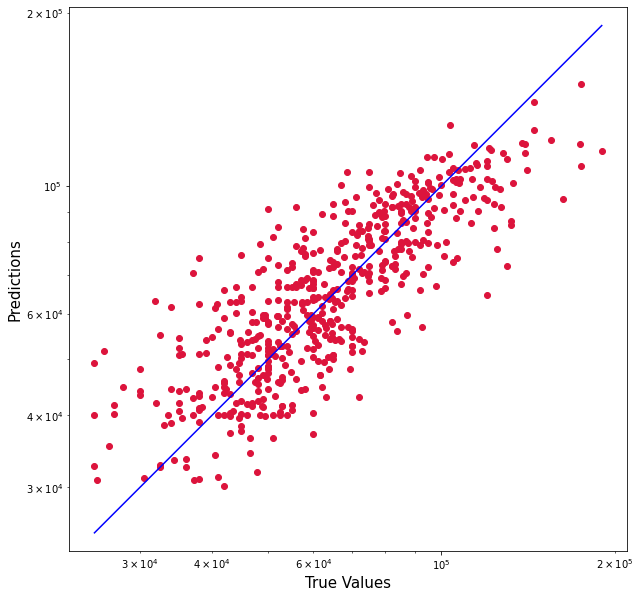

{'RMSE': 15252.758811555845,
 'MAE': 11239.029239483703,
 'R2': 0.6731236206414506,
 'R2_Adj': 0.6663902120778851,
 'Model': nan}

In [15]:
results = plot_y(y,y_pred)
results

### PolynomialFeatures

=== Degree 1
Results...
Testing RMSE:   15252.758811555845
Testing MAE:    11239.0292394837
Testing R2:     0.6731236206414506
Testing R2 Adj: 0.6663902120778851


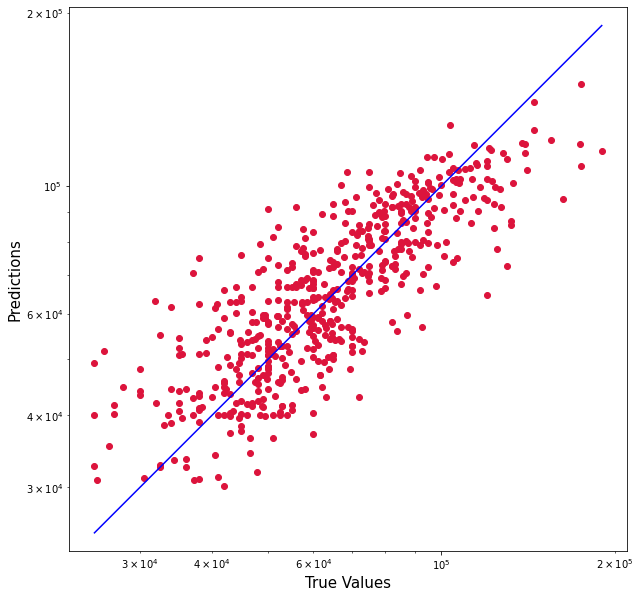

=== Degree 2
Results...
Testing RMSE:   13340.119232509174
Testing MAE:    9850.755780677655
Testing R2:     0.7499619198798652
Testing R2 Adj: 0.7448113227238324


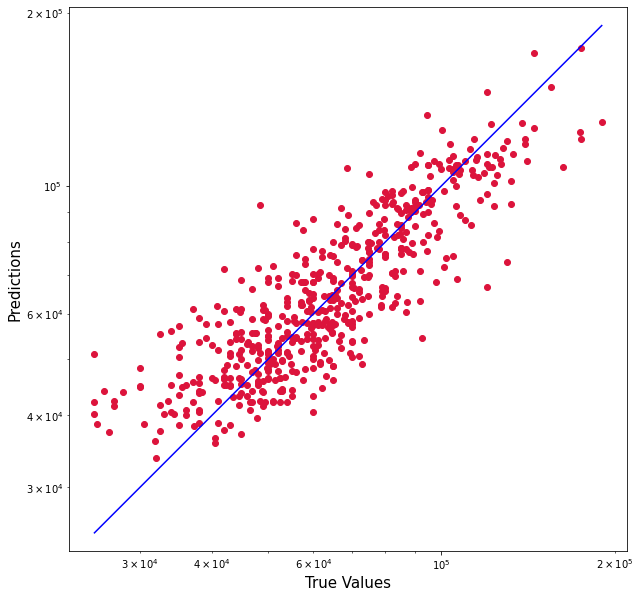

=== Degree 3
Results...
Testing RMSE:   9359.109148545826
Testing MAE:    6601.464858058608
Testing R2:     0.8769289920808139
Testing R2 Adj: 0.8743938215056996


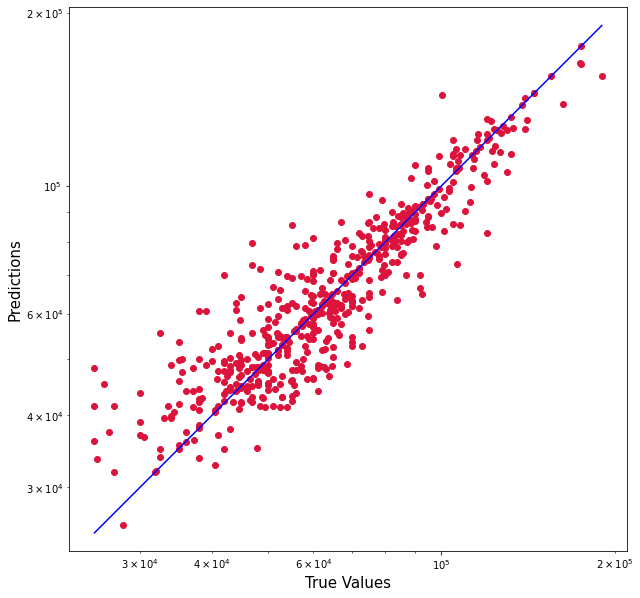

=== Degree 4
Results...
Testing RMSE:   4643.394442304277
Testing MAE:    2159.199919871795
Testing R2:     0.9697059116612433
Testing R2 Adj: 0.9690818761336659


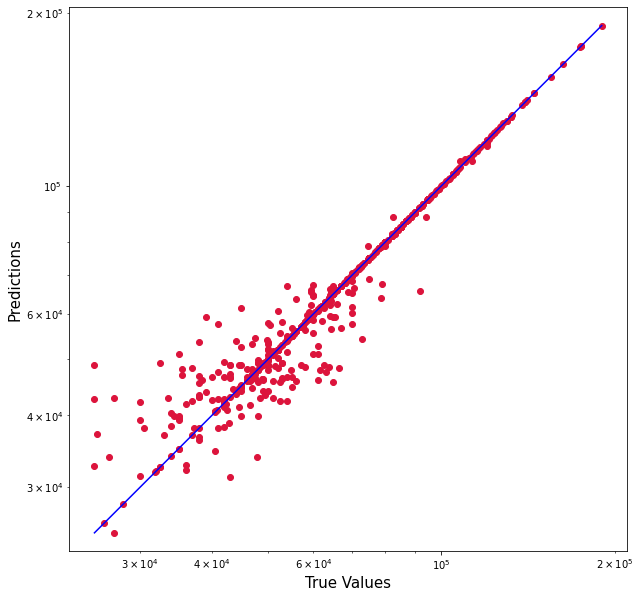

=== Degree 5
Results...
Testing RMSE:   4007.9966869650734
Testing MAE:    1627.6665964650583
Testing R2:     0.9774294864491593
Testing R2 Adj: 0.9769645507767637


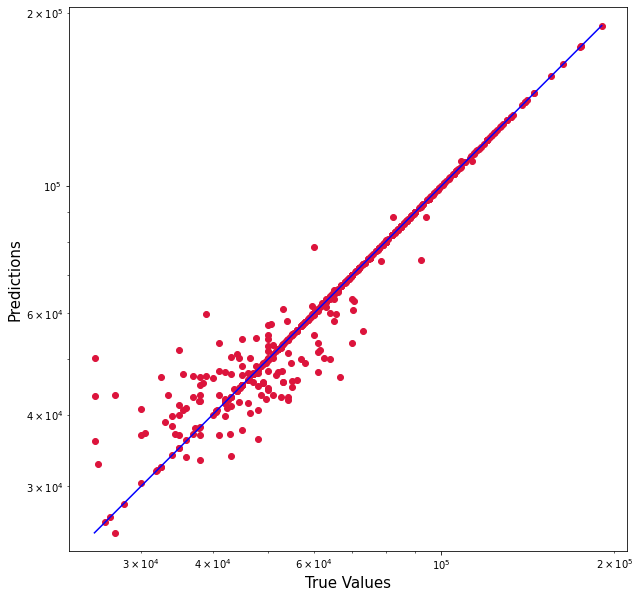

=== Degree 6
Results...
Testing RMSE:   3674.9086586950307
Testing MAE:    1403.747101836152
Testing R2:     0.9810250853534161
Testing R2 Adj: 0.9806342163251157


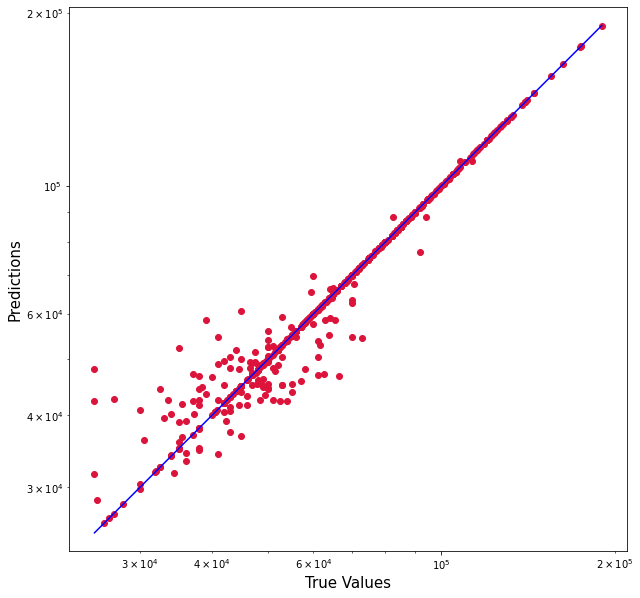

=== Degree 7
Results...
Testing RMSE:   3118.643709522514
Testing MAE:    1113.4520368191786
Testing R2:     0.9863347287720178
Testing R2 Adj: 0.9860532344208796


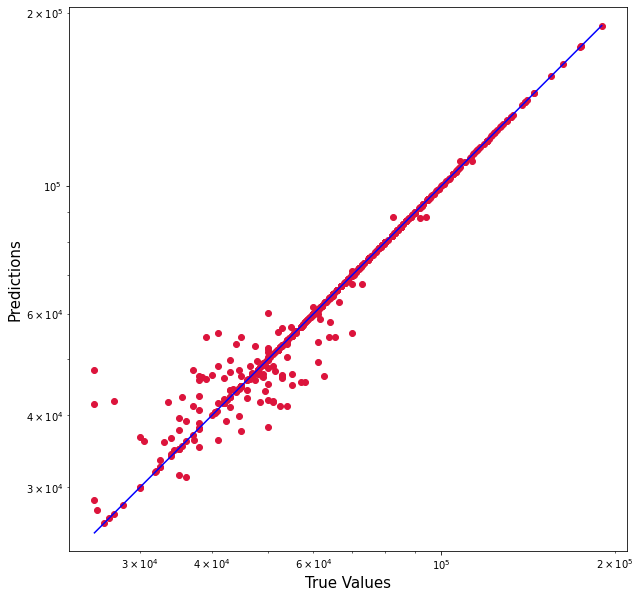

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

results = pd.DataFrame(columns=['RMSE','MAE','R2','R2_Adj'])
models = pd.DataFrame(columns=['Model'])
for i in range(1,8):
    
    model = make_pipeline(PolynomialFeatures(degree = i), LinearRegression())
    model.fit(X,y)
    y_pred = model.predict(X)
    print(f'=== Degree {i}')
    results = results.append(plot_y(y,y_pred),ignore_index=True)
    results.loc[i-1,'Model'] = model

In [17]:
results['Degree'] = [i for i in range (1,8)]
results = results.set_index('Degree')

In [18]:
results

,RMSE,MAE,R2,R2_Adj,Model
Degree,,,,,
1,15252.758812,11239.029239,0.673124,0.666390,"(PolynomialFeatures(degree=1), LinearRegressio..."
2,13340.119233,9850.755781,0.749962,0.744811,"(PolynomialFeatures(), LinearRegression())"
3,9359.109149,6601.464858,0.876929,0.874394,"(PolynomialFeatures(degree=3), LinearRegressio..."
4,4643.394442,2159.199920,0.969706,0.969082,"(PolynomialFeatures(degree=4), LinearRegressio..."
5,4007.996687,1627.666596,0.977429,0.976965,"(PolynomialFeatures(degree=5), LinearRegressio..."
6,3674.908659,1403.747102,0.981025,0.980634,"(PolynomialFeatures(degree=6), LinearRegressio..."
7,3118.643710,1113.452037,0.986335,0.986053,"(PolynomialFeatures(degree=7), LinearRegressio..."


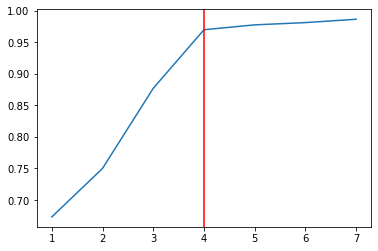

In [19]:
plt.plot([i for i in range(1,8)],results['R2'])
plt.axvline(x=4,color = 'red');

In [20]:
best_model = results['Model'][4]
best_model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [21]:
from statsmodels.api import OLS
import statsmodels.api as sm

X = sm.add_constant(X)
X

,const,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1.0,0.323028,0.047235,-0.569495,0.221704,0.40519,-0.464796,1.363319,-0.219054,-0.681034,0.357567,-0.553372
1,1.0,-0.531013,-1.310147,-0.569495,-0.931157,0.40519,-0.464796,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372
2,1.0,-0.964958,0.047235,-0.569495,-0.931157,0.40519,-0.464796,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372
3,1.0,0.692343,0.047235,-0.569495,0.221704,0.40519,2.151480,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372
4,1.0,0.558466,-1.310147,-0.569495,-0.931157,0.40519,-0.464796,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...
541,1.0,-0.161698,0.047235,1.423737,2.527427,0.40519,2.151480,-0.733504,-0.219054,1.468356,-0.804525,-0.553372
542,1.0,0.392275,0.047235,1.423737,2.527427,0.40519,-0.464796,-0.733504,-0.219054,1.468356,-0.804525,-0.553372
543,1.0,0.392275,0.047235,1.423737,2.527427,0.40519,2.151480,-0.733504,-0.219054,1.468356,0.357567,-0.553372
544,1.0,0.392275,0.047235,1.423737,0.221704,0.40519,2.151480,-0.733504,-0.219054,1.468356,0.357567,-0.553372


In [22]:
from statsmodels.api import OLS

model = OLS(y, X).fit()

summary1 = model.summary()
summary1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     99.97
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          6.18e-122
Time:                        22:30:53   Log-Likelihood:                -6034.1
No. Observations:                 546   AIC:                         1.209e+04
Df Residuals:                     534   BIC:                         1.214e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.812e+04    660.051    103.206      0.000    6.68e+04    6.94e+04
lotsize     7681.9033    758.810     10.124      0.000    6191.284    9172.522
bedrooms    1349.6596    771.338      1.750      0.081    -165.569    2864.889
bathrms     7192.1181    747.490      9.622      0.000    5723.737    8660.500
stories     5687.5411    802.603      7.086      0.000    4110.895    7264.188
driveway    2327.6681    711.844      3.270      0.001     929.311    3726.026
recroom     1724.3148    726.207      2.374      0.018     297.742    3150.887
fullbase    2600.3079    757.348      3.433      0.001    1112.562    4088.054
gashw       2682.0723    672.555      3.988      0.000    1360.894    4003.251
airco       5877.4312    723.471      8.124      0.000    4456.233    7298.629
garagepl    3652.7494    723.303      5.050      0.000    2231.881    5073.618
prefarea    3969.3328    707.099      5.614      0.000    2580.295    5358.370
==============================================================================
Omnibus:                       93.454   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.620
Skew:                           0.853   Prob(JB):                     1.70e-54
Kurtosis:                       5.824   Cond. No.                         2.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# P-value >= 0.05

Null hypothesis states that feature 'bedrooms' is not important. 
Alternative hypothesis states that feature bedrooms is important.

P-value of 8% ( P>|t| >= 0.05) indicates a degree of confidence in null hypothesis.
Therefore null-hypothesis is accepted, and feature bedrooms is not necessary.

In [23]:
X.drop('bedrooms',axis =1,inplace=True)
X.head()

,const,lotsize,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1.0,0.323028,-0.569495,0.221704,0.40519,-0.464796,1.363319,-0.219054,-0.681034,0.357567,-0.553372
1,1.0,-0.531013,-0.569495,-0.931157,0.40519,-0.464796,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372
2,1.0,-0.964958,-0.569495,-0.931157,0.40519,-0.464796,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372
3,1.0,0.692343,-0.569495,0.221704,0.40519,2.151480,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372
4,1.0,0.558466,-0.569495,-0.931157,0.40519,-0.464796,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372


Results...
Testing RMSE:   6423.903749466289
Testing MAE:    3659.219479739011
Testing R2:     0.9420191225494904
Testing R2 Adj: 0.9408247599053787


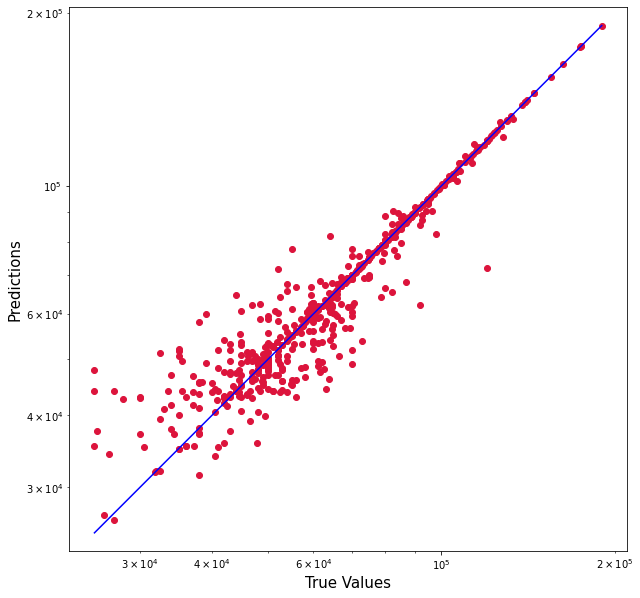

In [24]:
results_bedrooms = pd.DataFrame(columns=['RMSE','MAE','R2','R2_Adj'])
models = pd.DataFrame(columns=['Model'])

model = make_pipeline(PolynomialFeatures(degree = 4), LinearRegression())
model.fit(X,y)
y_pred = model.predict(X)
results_bedrooms = results_bedrooms.append(plot_y(y,y_pred),ignore_index=True)
results_bedrooms.loc[0,'Model'] = model

In [25]:
results[results.index == 4]

,RMSE,MAE,R2,R2_Adj,Model
Degree,,,,,
4,4643.394442,2159.19992,0.969706,0.969082,"(PolynomialFeatures(degree=4), LinearRegressio..."


In [26]:
results_bedrooms

,RMSE,MAE,R2,R2_Adj,Model
0,6423.903749,3659.21948,0.942019,0.940825,"(PolynomialFeatures(degree=4), LinearRegressio..."


In [27]:
model = OLS(y, X).fit()

summary2 = model.summary()
summary2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     109.2
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          2.62e-122
Time:                        22:30:54   Log-Likelihood:                -6035.7
No. Observations:                 546   AIC:                         1.209e+04
Df Residuals:                     535   BIC:                         1.214e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.812e+04    661.322    103.008      0.000    6.68e+04    6.94e+04
lotsize     7789.2818    757.780     10.279      0.000    6300.692    9277.872
bathrms     7487.4166    729.591     10.262      0.000    6054.202    8920.631
stories     6183.5707    752.317      8.219      0.000    4705.713    7661.429
driveway    2178.6474    708.091      3.077      0.002     787.668    3569.627
recroom     1697.2253    727.439      2.333      0.020     268.238    3126.213
fullbase    2788.2696    751.134      3.712      0.000    1312.736    4263.803
gashw       2706.7448    673.702      4.018      0.000    1383.320    4030.170
airco       5864.8841    724.828      8.091      0.000    4441.026    7288.742
garagepl    3747.8303    722.647      5.186      0.000    2328.256    5167.404
prefarea    3995.7110    708.299      5.641      0.000    2604.322    5387.100
==============================================================================
Omnibus:                       98.563   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.305
Skew:                           0.887   Prob(JB):                     3.32e-59
Kurtosis:                       5.948   Cond. No.                         2.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
summary1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     99.97
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          6.18e-122
Time:                        22:30:53   Log-Likelihood:                -6034.1
No. Observations:                 546   AIC:                         1.209e+04
Df Residuals:                     534   BIC:                         1.214e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.812e+04    660.051    103.206      0.000    6.68e+04    6.94e+04
lotsize     7681.9033    758.810     10.124      0.000    6191.284    9172.522
bedrooms    1349.6596    771.338      1.750      0.081    -165.569    2864.889
bathrms     7192.1181    747.490      9.622      0.000    5723.737    8660.500
stories     5687.5411    802.603      7.086      0.000    4110.895    7264.188
driveway    2327.6681    711.844      3.270      0.001     929.311    3726.026
recroom     1724.3148    726.207      2.374      0.018     297.742    3150.887
fullbase    2600.3079    757.348      3.433      0.001    1112.562    4088.054
gashw       2682.0723    672.555      3.988      0.000    1360.894    4003.251
airco       5877.4312    723.471      8.124      0.000    4456.233    7298.629
garagepl    3652.7494    723.303      5.050      0.000    2231.881    5073.618
prefarea    3969.3328    707.099      5.614      0.000    2580.295    5358.370
==============================================================================
Omnibus:                       93.454   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.620
Skew:                           0.853   Prob(JB):                     1.70e-54
Kurtosis:                       5.824   Cond. No.                         2.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion:

when we take a first look at the OLS summary, we concluded first that 'bedrooms' feature was useless as it had a P-value of less than 5%. furthermore, when we removed it, it didn't further negatively affect the P-value of all the other features, which points out that removing the feature was the right move. However, after training the model the overall accuracy and R2/R2_adjusted dropped by a significant amount and the Log-Likelihood of the report has decreased by a small margin and the RMSE has increased by around 20%, which might indicate that it's not worth it to remove the 'bedrooms' feature.

=== Degree 1
Results...
Testing RMSE:   15296.421956774453
Testing MAE:    11223.228374218752
Testing R2:     0.6712494837150598
Testing R2 Adj: 0.6644774693346583


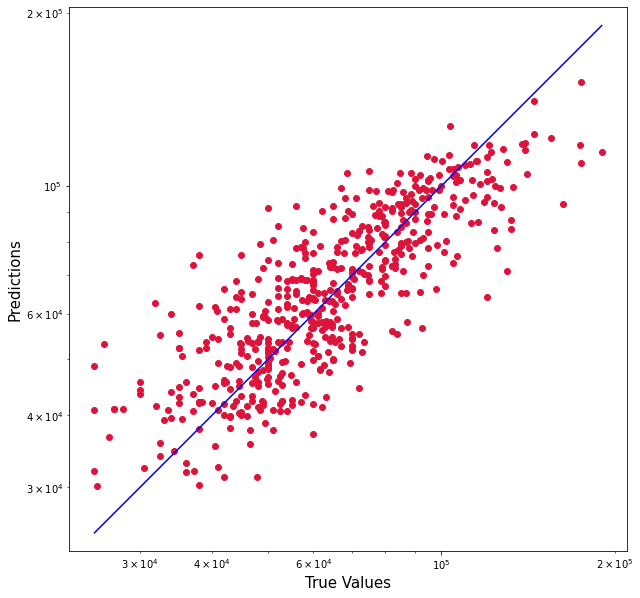

=== Degree 2
Results...
Testing RMSE:   13785.919522756256
Testing MAE:    10106.74358974359
Testing R2:     0.7329711343542382
Testing R2 Adj: 0.7274705397435577


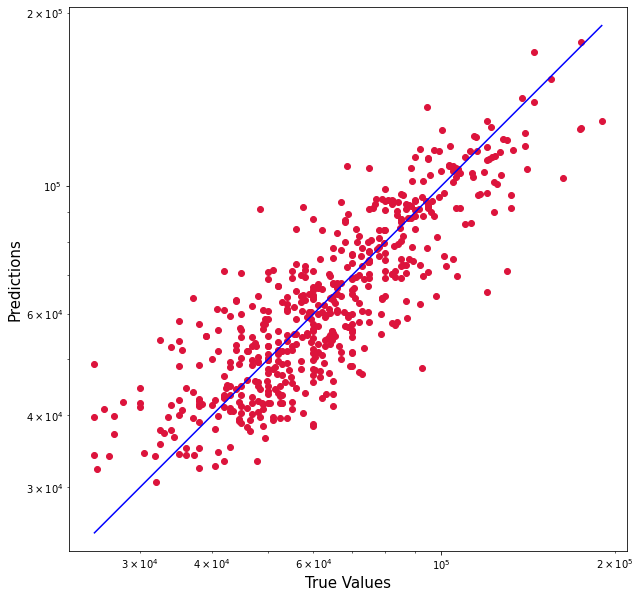

=== Degree 3
Results...
Testing RMSE:   10531.472508779683
Testing MAE:    7501.498626373626
Testing R2:     0.8441650270781643
Testing R2 Adj: 0.8409549433662913


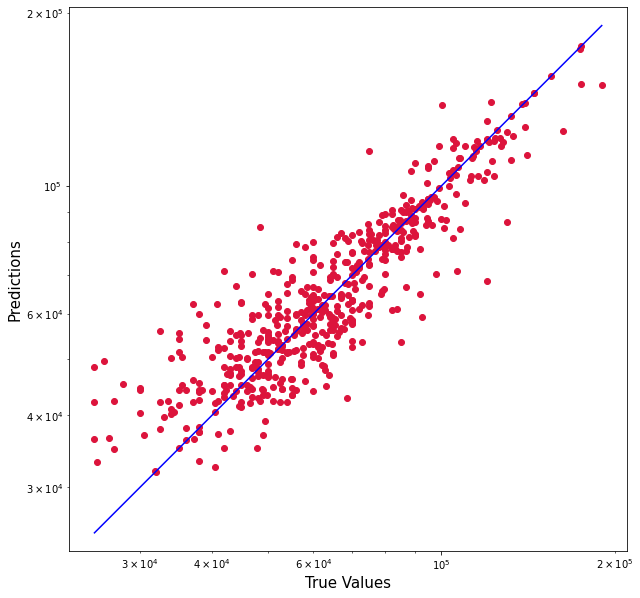

=== Degree 4
Results...
Testing RMSE:   6423.903749466289
Testing MAE:    3659.219479739011
Testing R2:     0.9420191225494904
Testing R2 Adj: 0.9408247599053787


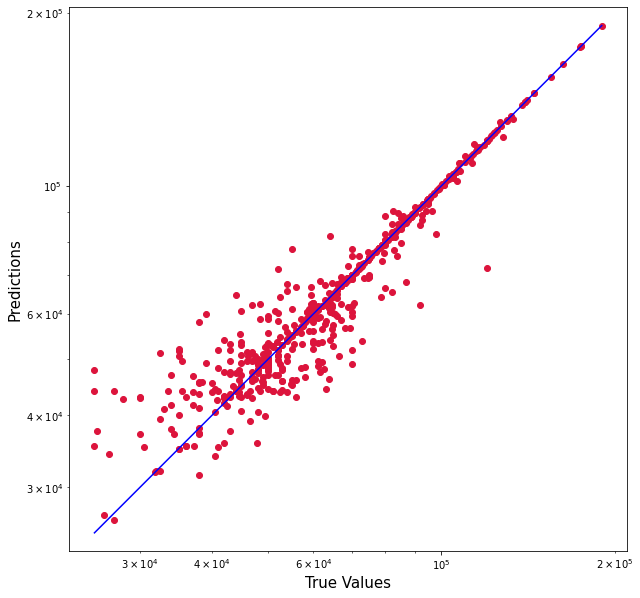

=== Degree 5
Results...
Testing RMSE:   5497.564066693697
Testing MAE:    2625.3328571249713
Testing R2:     0.9575353712694737
Testing R2 Adj: 0.9566606317263355


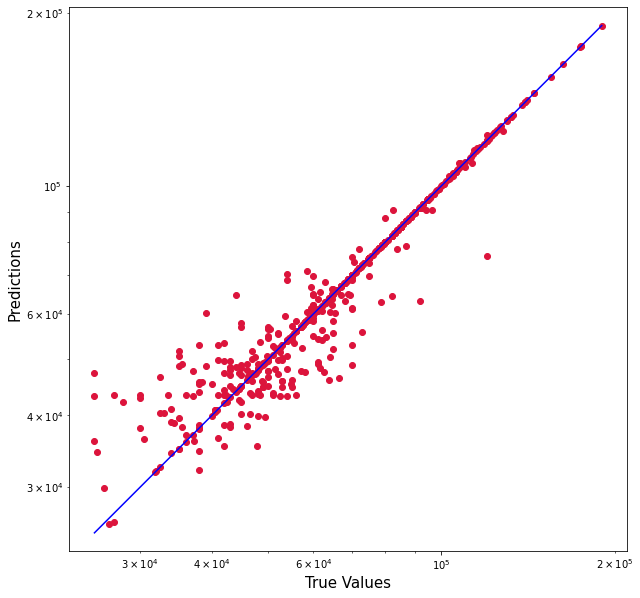

=== Degree 6
Results...
Testing RMSE:   5095.982167868797
Testing MAE:    2361.500245705629
Testing R2:     0.9635126323846073
Testing R2 Adj: 0.9627610199430917


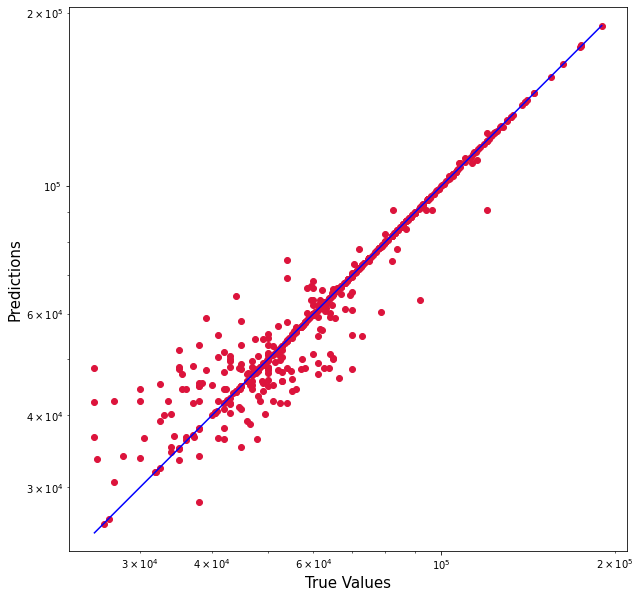

=== Degree 7
Results...
Testing RMSE:   4474.627332409645
Testing MAE:    1980.80778662713
Testing R2:     0.9718680086468081
Testing R2 Adj: 0.971288510697585


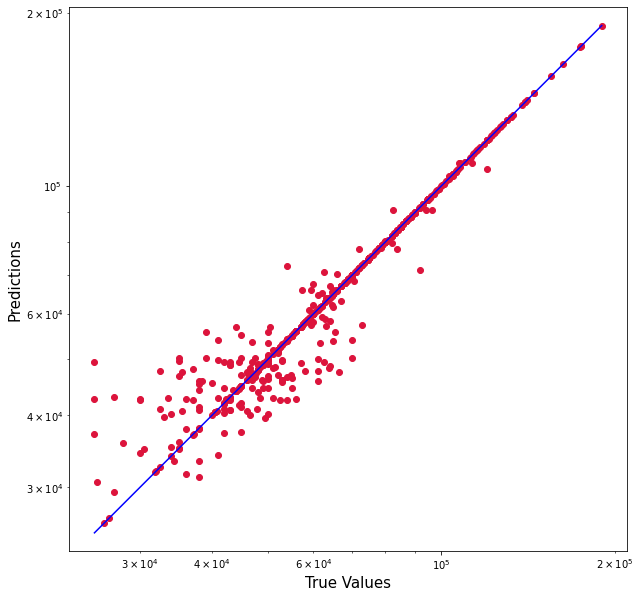

In [29]:
results_not = pd.DataFrame(columns=['RMSE','MAE','R2','R2_Adj'])
models = pd.DataFrame(columns=['Model'])
for i in range(1,8):
    
    model = make_pipeline(PolynomialFeatures(degree = i), LinearRegression())
    model.fit(X,y)
    y_pred = model.predict(X)
    print(f'=== Degree {i}')
    results_not = results_not.append(plot_y(y,y_pred),ignore_index=True)
    results_not.loc[i-1,'Model'] = model

In [30]:
results

,RMSE,MAE,R2,R2_Adj,Model
Degree,,,,,
1,15252.758812,11239.029239,0.673124,0.666390,"(PolynomialFeatures(degree=1), LinearRegressio..."
2,13340.119233,9850.755781,0.749962,0.744811,"(PolynomialFeatures(), LinearRegression())"
3,9359.109149,6601.464858,0.876929,0.874394,"(PolynomialFeatures(degree=3), LinearRegressio..."
4,4643.394442,2159.199920,0.969706,0.969082,"(PolynomialFeatures(degree=4), LinearRegressio..."
5,4007.996687,1627.666596,0.977429,0.976965,"(PolynomialFeatures(degree=5), LinearRegressio..."
6,3674.908659,1403.747102,0.981025,0.980634,"(PolynomialFeatures(degree=6), LinearRegressio..."
7,3118.643710,1113.452037,0.986335,0.986053,"(PolynomialFeatures(degree=7), LinearRegressio..."


In [31]:
results_not

,RMSE,MAE,R2,R2_Adj,Model
0,15296.421957,11223.228374,0.671249,0.664477,"(PolynomialFeatures(degree=1), LinearRegressio..."
1,13785.919523,10106.743590,0.732971,0.727471,"(PolynomialFeatures(), LinearRegression())"
2,10531.472509,7501.498626,0.844165,0.840955,"(PolynomialFeatures(degree=3), LinearRegressio..."
3,6423.903749,3659.219480,0.942019,0.940825,"(PolynomialFeatures(degree=4), LinearRegressio..."
4,5497.564067,2625.332857,0.957535,0.956661,"(PolynomialFeatures(degree=5), LinearRegressio..."
5,5095.982168,2361.500246,0.963513,0.962761,"(PolynomialFeatures(degree=6), LinearRegressio..."
6,4474.627332,1980.807787,0.971868,0.971289,"(PolynomialFeatures(degree=7), LinearRegressio..."


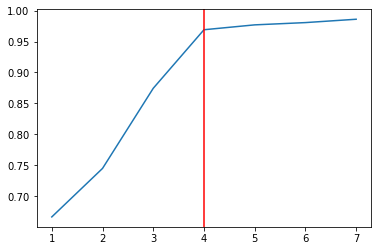

In [32]:
plt.plot([i for i in range(1,8)],results['R2_Adj'])
plt.axvline(x=4,color = 'red');

# Data Engineering (Approach 2)

In [33]:
X = df.drop('price',axis = 1)
y = df['price']

In [34]:
# feature_names = [[ key + ' ' + str(i) for i in range(1,5)] for key in X.keys()]
# def flatten(t):
#     return [item for sublist in t for item in sublist]

# flat_features = flatten(feature_names)
# len(flat_features)

In [35]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [36]:
model = PolynomialFeatures(degree=4)
X = model.fit_transform(X)

In [37]:
X = pd.DataFrame(X)

In [38]:
X.rename(columns=lambda x: f'feature {x}',inplace=True)

In [39]:
X.head()

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 1355,feature 1356,feature 1357,feature 1358,feature 1359,feature 1360,feature 1361,feature 1362,feature 1363,feature 1364
0,1.0,0.323028,0.047235,-0.569495,0.221704,0.40519,-0.464796,1.363319,-0.219054,-0.681034,...,0.142027,-0.031134,0.048184,-0.074569,0.115404,0.016347,-0.025298,0.039151,-0.060591,0.093771
1,1.0,-0.531013,-1.310147,-0.569495,-0.931157,0.40519,-0.464796,-0.733504,-0.219054,-0.681034,...,0.142027,0.354639,0.243930,0.167781,0.115404,0.418946,0.288161,0.198204,0.136330,0.093771
2,1.0,-0.964958,0.047235,-0.569495,-0.931157,0.40519,-0.464796,-0.733504,-0.219054,-0.681034,...,0.142027,0.354639,0.243930,0.167781,0.115404,0.418946,0.288161,0.198204,0.136330,0.093771
3,1.0,0.692343,0.047235,-0.569495,0.221704,0.40519,2.151480,-0.733504,-0.219054,-0.681034,...,0.142027,0.354639,0.243930,0.167781,0.115404,0.418946,0.288161,0.198204,0.136330,0.093771
4,1.0,0.558466,-1.310147,-0.569495,-0.931157,0.40519,-0.464796,-0.733504,-0.219054,-0.681034,...,0.142027,0.354639,0.243930,0.167781,0.115404,0.418946,0.288161,0.198204,0.136330,0.093771


In [40]:
model = OLS(y, X)
results_ols = model.fit()

summary3 = results_ols.summary()

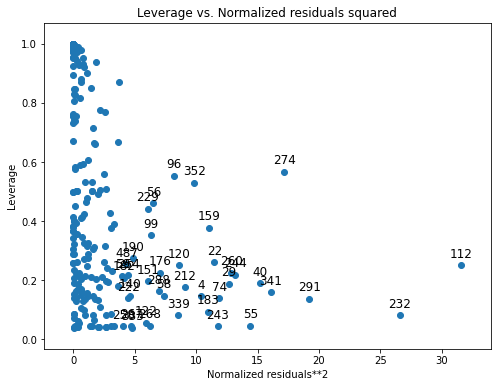

In [41]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize = (8, 6))
plot_leverage_resid2(results_ols, ax = ax)
plt.show()

In [42]:
outlier_test = results_ols.outlier_test()

G:\Apps\Anaconda\install\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
G:\Apps\Anaconda\install\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: divide by zero encountered in true_divide
  return self.resid / sigma / np.sqrt(1 - hii)


In [43]:
outlier_test.head()

,student_resid,unadj_p,bonf(p)
0,1.047228,0.297048,1.0
1,-0.787040,0.432772,1.0
2,0.742705,0.459076,1.0
3,NaN,NaN,NaN
4,1.672126,0.097042,1.0


In [44]:
filt = outlier_test['bonf(p)'] < 0.05
sum(filt)

25

In [45]:
outliers = outlier_test[filt]
outliers.head()

,student_resid,unadj_p,bonf(p)
91,-inf,0.0,0.0
108,inf,0.0,0.0
113,inf,0.0,0.0
147,inf,0.0,0.0
163,inf,0.0,0.0


In [46]:
outlier_indices = outliers.index
outlier_indices

Int64Index([ 91, 108, 113, 147, 163, 175, 184, 251, 257, 273, 321, 324, 330,
            331, 356, 373, 381, 410, 415, 444, 445, 455, 465, 482, 544],
           dtype='int64')

### Dropping outliers

In [47]:
i = 0
while len(outlier_indices > 0) & i < 3: 
    y.drop(outlier_indices, inplace = True)
    X.drop(outlier_indices,inplace = True)

    model = OLS(y, X)
    results_ols = model.fit()

    summary3 = results_ols.summary()

    outlier_test = results_ols.outlier_test()

    filt = outlier_test['bonf(p)'] < 0.05

    outliers = outlier_test[filt]

    outlier_indices = outliers.index
    
    i+=1
    

G:\Apps\Anaconda\install\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
G:\Apps\Anaconda\install\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: divide by zero encountered in true_divide
  return self.resid / sigma / np.sqrt(1 - hii)
G:\Apps\Anaconda\install\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
G:\Apps\Anaconda\install\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: divide by zero encountered in true_divide
  return self.resid / sigma / np.sqrt(1 - hii)
G:\Apps\Anaconda\install\lib\site-packages\numpy\linalg\linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
G:\Apps\Anaconda\install\lib\site-packages\statsmodels\stats\outliers_influence.

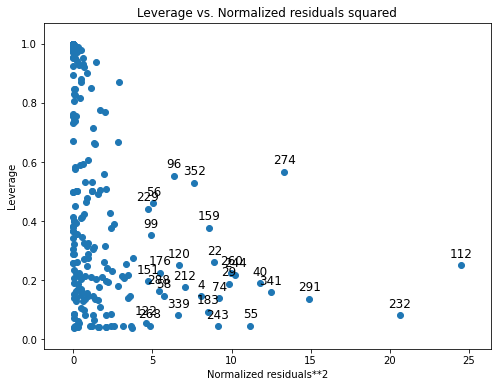

In [48]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize = (8, 6))
plot_leverage_resid2(results_ols, ax = ax)
plt.show()

In [49]:
False | False

False

In [50]:
data = summary3.tables[1].data

In [51]:
data[0]

['', 'coef', 'std err', 't', 'P>|t|', '[0.025', '0.975]']

In [52]:
my_data = pd.DataFrame(data,columns=data[0])

In [53]:
my_data = my_data.drop(0).set_index('')

In [54]:
my_data['P>|t|'] = my_data['P>|t|'].astype(float)

In [55]:
relevent_features = my_data[my_data['P>|t|'] <= 0.05].index

In [56]:
relevent_features

Index(['feature 377', 'feature 418', 'feature 1300'], dtype='object', name='')

In [57]:
X_new = X[relevent_features]

In [58]:
# model = LinearRegression()
# model.fit(X_new,y)
# y_pred = model.predict(X_new)

In [59]:
#poly

#loop
    #OLS (general)
    #loop
        #outliers
        #drop

    # p > 0.05 remove (highest one)

#train1

#outliers

#train2